In [33]:
import os
import pandas as pd

import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Directory that stores the csv files
data_dir = r'..\csv'

In [35]:
# Data loading

matches = pd.read_csv(os.path.join(data_dir, 'Matches.csv'))
cups = pd.read_csv(os.path.join(data_dir, 'Cups.csv'))

In [36]:
matches.head()

,Year,Datetime,Stage,Stadium,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,France,4.0,1.0,Mexico
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,USA,3.0,0.0,Belgium
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Yugoslavia,2.0,1.0,Brazil
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Romania,3.0,1.0,Peru
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Argentina,1.0,0.0,France


In [37]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Avg Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000,"24,139"
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000,"23,235"
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000,"26,833"
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000,"60,773"
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,943000,"36,269"


### Data Cleaning

In [38]:
# Some teams have 'rn"' at the beginning of their names. We need to clean this
print('Before Cleaning...')
print(matches['Home Team Name'][matches['Home Team Name'].str.contains('rn"')], end='\n\n')

# Lambda function to perform our task
clean_names = lambda x: x[4:] if 'rn"' in x else x

matches['Home Team Name'] = matches['Home Team Name'].apply(clean_names)
matches['Away Team Name'] = matches['Away Team Name'].apply(clean_names)

print('After Cleaning...')
print(matches['Home Team Name'][matches['Home Team Name'].str.contains('rn"')])

Before Cleaning...
414      rn">United Arab Emirates
433       rn">Republic of Ireland
446       rn">Republic of Ireland
452       rn">Republic of Ireland
492       rn">Republic of Ireland
582       rn">Republic of Ireland
647       rn">Trinidad and Tobago
649     rn">Serbia and Montenegro
813    rn">Bosnia and Herzegovina
Name: Home Team Name, dtype: object

After Cleaning...
Series([], Name: Home Team Name, dtype: object)


In [39]:
# Under Allied occupation and division, two other separate national teams were also recognised by FIFA: 
# the Saarland team representing the Saarland (1950–1956) and the East German team representing the German Democratic Republic 
# (1952–1990). Both have been absorbed along with their records by the current national team. The official name and code 
# "Germany FR (FRG)" was shortened to "Germany (GER)" following the reunification in 1990
# So, we need to change 'Germany FR' to 'Germany'

print('Before Cleaning...')
print(matches['Home Team Name'][matches['Home Team Name'].str.contains('Germany')].value_counts(), end='\n\n')

# We'll again use a lambda function
germany = lambda x: 'Germany' if x == 'Germany FR' else x

matches['Home Team Name'] = matches['Home Team Name'].apply(germany)
matches['Away Team Name'] = matches['Away Team Name'].apply(germany)
for col in cups.columns[2:6]:
    cups[col] = cups[col].apply(germany)
    
print('After Cleaning...')
print(matches['Home Team Name'][matches['Home Team Name'].str.contains('Germany')].value_counts())

Before Cleaning...
Germany FR    43
Germany       33
Name: Home Team Name, dtype: int64

After Cleaning...
Germany    76
Name: Home Team Name, dtype: int64


In [40]:
# Changing name of 'Maracan Stadium' to Maracanã Stadium'
matches['Stadium'] = matches['Stadium'].apply(lambda x: 'Maracanã Stadium' if 'Maracan' in x else x)

# Changing float data types to int data types so that these columns occupy less space in memory
matches.iloc[:, [0, 5, 6]] = matches.iloc[:, [0, 5, 6]].astype(int)
matches.dtypes

Year                int32
Datetime           object
Stage              object
Stadium            object
Home Team Name     object
Home Team Goals     int32
Away Team Goals     int32
Away Team Name     object
dtype: object

### There's a general pattern that we'll use throughout this notebook. It's as follows:
#### -- Use plt.style to style our plotted chart. I prefer 'seaborn-whitegrid'
#### -- Decide the size of the plot. 'fig' and 'ax' store the figure and axis, respectively
#### -- Give our plot a title
#### -- Customise x-ticks and y-ticks
#### -- Turn off all borders of the chart to give it a modern feel
#### -- Customise gridlines
#### -- Plot the visualisation using seaborn
#### -- Provide a legend if needed
#### -- Turn off x and y axis labels. This, too, is a part of modern design plotting where I do away with these if the plot is 
####           self-explanatory

# Who has won most WCs? (and the runners-up...)

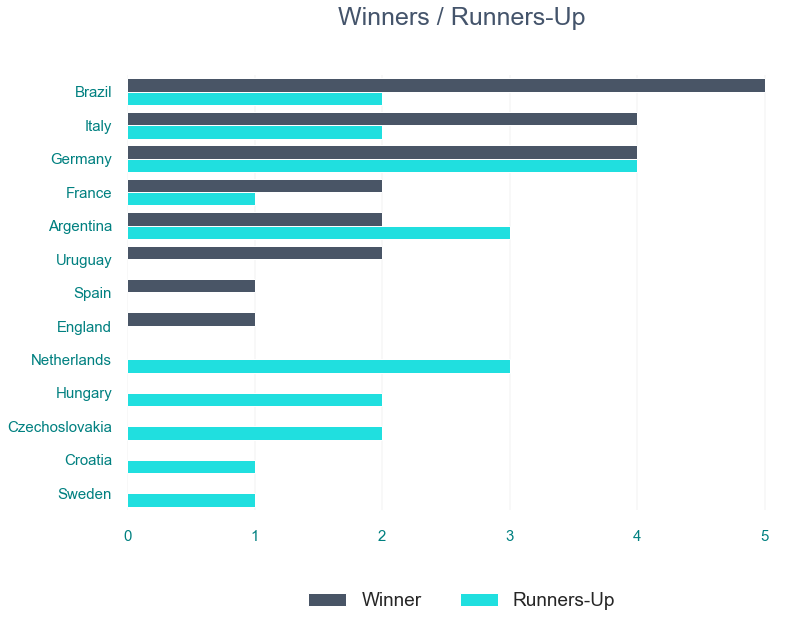

In [41]:
winners = cups['Winner'].value_counts().reset_index().rename(columns={'index': 'Country',
                                                                      'Winner': 'Count'}).assign(Type='Winner')
runners = cups['Runners-Up'].value_counts().reset_index().rename(columns={'index': 'Country',
                                                                          'Runners-Up': 'Count'}).assign(Type='Runners-Up')
win_loss = pd.concat([winners, runners], axis=0)

plt.style.use('seaborn-whitegrid')
fix, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Winners / Runners-Up', color='#44546B', pad=50, fontsize=25)

ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
ax.tick_params('y', colors='#008080', labelsize=15, pad=15)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

ax.grid(axis='x', color='gray', linewidth=0.1)

sns.barplot('Count', 'Country', data=win_loss, hue='Type', palette=['#44546B', 'cyan'], linewidth=1, edgecolor='white')

ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, prop={'size': 19}, frameon=False)

plt.ylabel('');
plt.xlabel('');

In [42]:
# Here's the data for the same
win_loss.reset_index(drop=True).style.set_properties(**{'background-color':'black',
                                                        'color' : 'cyan'}).set_caption('Winners / Runners-Up')

,Country,Count,Type
0,Brazil,5,Winner
1,Italy,4,Winner
2,Germany,4,Winner
3,France,2,Winner
4,Argentina,2,Winner
5,Uruguay,2,Winner
6,Spain,1,Winner
7,England,1,Winner
8,Germany,4,Runners-Up
9,Netherlands,3,Runners-Up


### Brazil has won the most no. of World Cups: 5
### Germany has been the top runners-up: 4

# What are The Countries with Most Wins? (top 15)

In [43]:
def decider(row):
    '''
    Takes a dataframe and checks if the value of one column is bigger than the other
    
    Parameters:
    row: dataframe (row-wise)
    '''
    
    if row['Home Team Goals'] > row['Away Team Goals']:
        results.loc[row['Home Team Name']]['Wins'] += 1
        results.loc[row['Away Team Name']]['Losses'] += 1
    elif  row['Home Team Goals'] < row['Away Team Goals']:
        results.loc[row['Away Team Name']]['Wins'] += 1
        results.loc[row['Home Team Name']]['Losses'] += 1
    else:
        results.loc[row['Home Team Name']]['Draws'] += 1
        results.loc[row['Away Team Name']]['Draws'] += 1
        

df = matches.copy()
results = pd.DataFrame({'Team'  : list(set(df['Away Team Name'])),
                        'Wins'  : 0,
                        'Losses': 0,
                        'Draws' : 0}).set_index('Team')

df.apply(decider, axis=1)

results.sort_values('Wins', ascending=False, inplace=True)

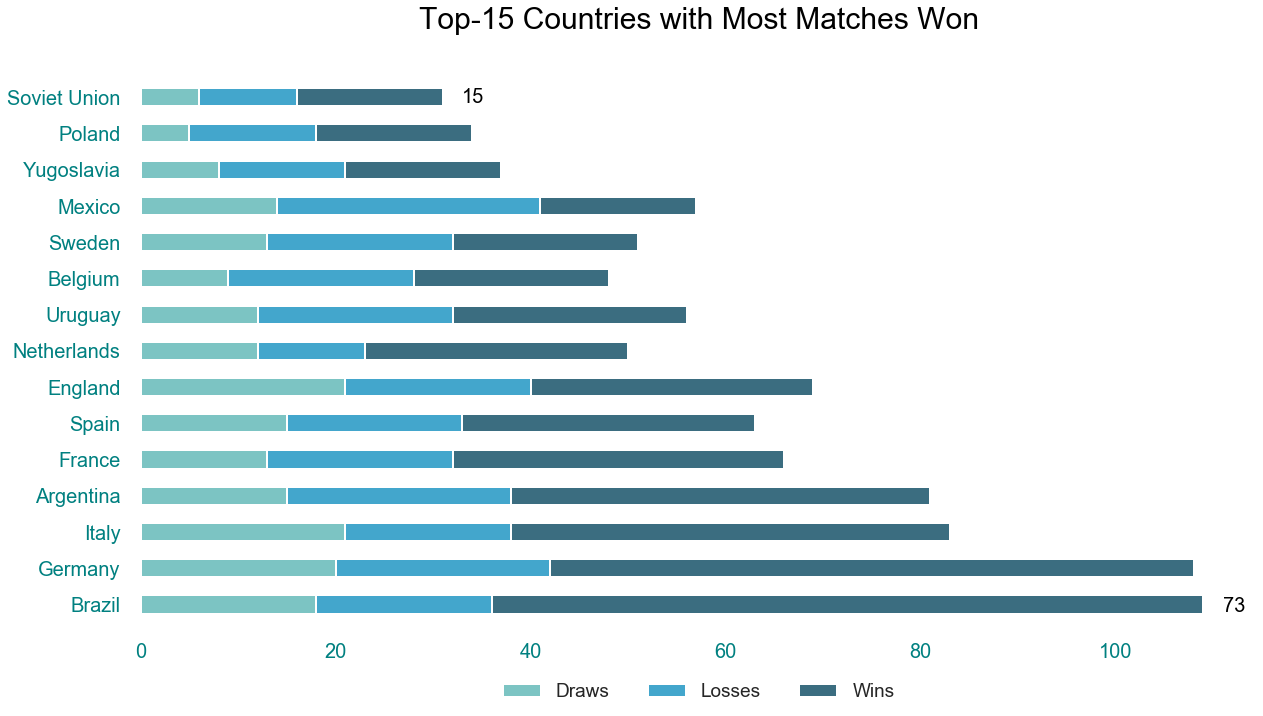

In [44]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Top-15 Countries with Most Matches Won', color='k', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

results[:15].plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette('GnBu_d', 3)[::-1]), linewidth=2, 
                  edgecolor='w', ax=ax)

ax.grid(False)

# This 'annotate' method allows us to write text that is specfic to a particular point in the plot
ax.annotate('73', xy=(111, -0.2), fontsize=20, color='k')
ax.annotate('15', xy=(33, 13.85), fontsize=20, color='k')

ax.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, prop={'size': 19}, frameon=False)
plt.ylabel('');

In [45]:
# Here's the data for the same
results[:15].style.set_properties(**{'background-color':'black',
                                     'color' : 'cyan'}).set_caption('Wins - Draws - Losses')

,Draws,Losses,Wins
Team,,,
Brazil,18,18,73
Germany,20,22,66
Italy,21,17,45
Argentina,15,23,43
France,13,19,34
Spain,15,18,30
England,21,19,29
Netherlands,12,11,27
Uruguay,12,20,24


### Brazil has won the most no. of matches: 73
### Hungary stands at no. 15 with 15 matches won

# Who has an advantage: Home Team or Away Team?

In [46]:
def label(matches):
    '''
    Takes a dataframe and compares values of adjacent columns
    
    Parameters:
    matches: dataframe 
    '''
    
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home team win'
    if matches['Away Team Goals'] > matches['Home Team Goals']:
        return 'Away team win'
    if matches['Home Team Goals'] == matches['Away Team Goals']:
        return 'Draw'

outcomes = matches.apply(lambda matches:label(matches),axis=1)

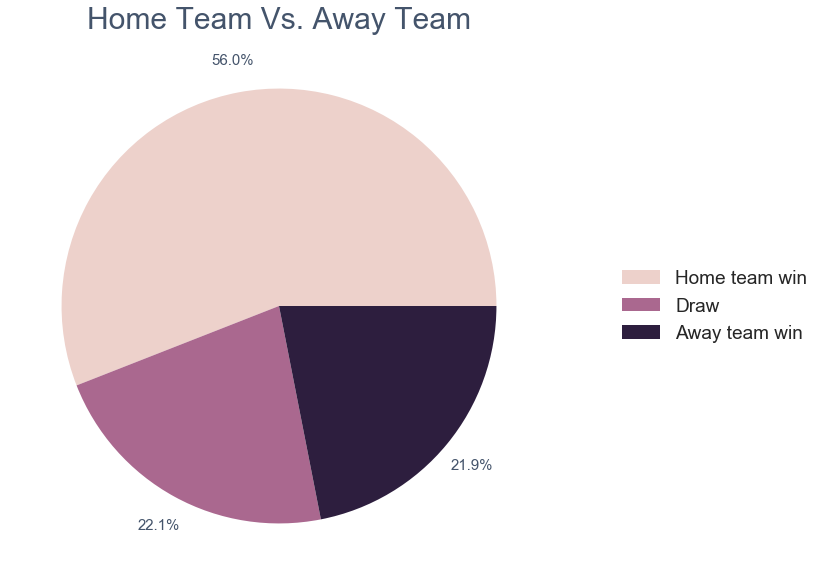

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Home Team Vs. Away Team', color='#44546B', fontsize=30)

data = outcomes.value_counts()

# We extracted the 'wedges' so that we can supply it to the legend below!
wedges, texts, autotexts = ax.pie(data, colors=sns.cubehelix_palette(3), pctdistance=1.15, autopct='%1.1f%%', 
                                  textprops={'fontsize': 15, 'color': '#44546B'});

ax.legend(wedges, data.index, loc='center left', bbox_to_anchor=(1.1, 0, 0.5, 1), 
          prop={'size': 19}, frameon=False);

In [48]:
# Here's the data for the same
data

Home team win    503
Draw             199
Away team win    197
dtype: int64

### The Home Teams have a distinctively clear advantage! Is this the power of fans? Definitely yes!

# What are the Statistics of Goals Scored during Each Match Per Year?

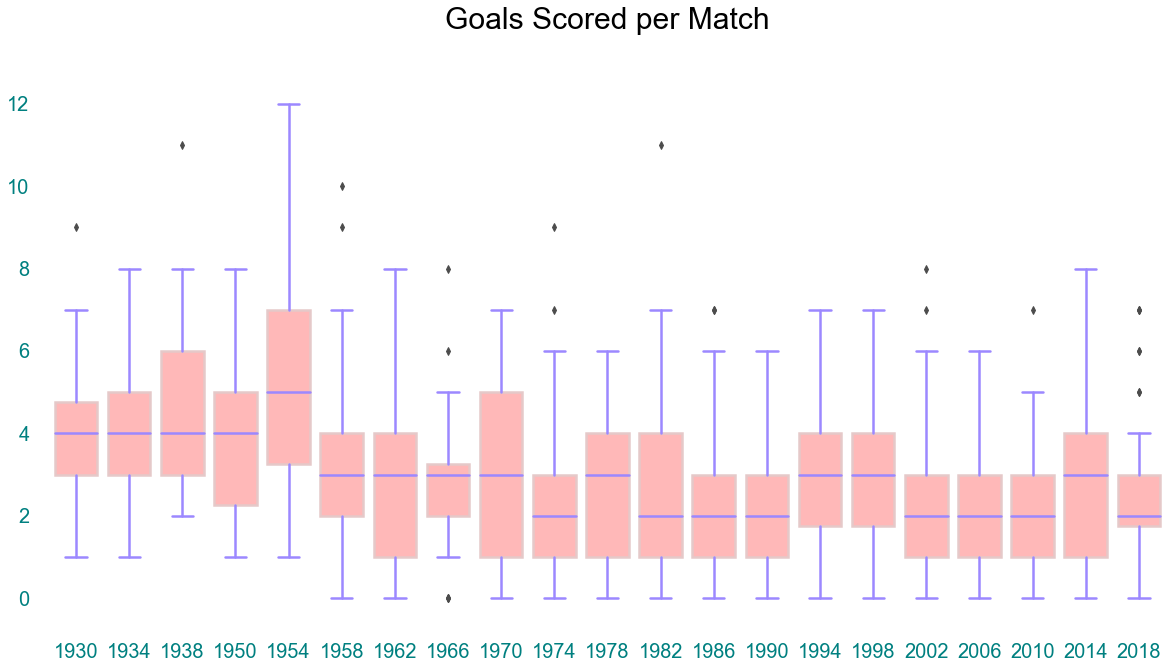

In [49]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Goals Scored per Match', color='k', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

ax.grid(False)

ax = sns.boxplot(matches['Year'].astype(int), matches['Home Team Goals'] + matches['Away Team Goals'], color='cyan', 
            width=0.8, linewidth=2.5)

# This helps us to customise the boxplot to our liking
for i,box in enumerate(ax.artists):
    box.set_edgecolor('#e5c9c9')
    box.set_facecolor('#ffb8b8')

    # Iterate over whiskers and median lines
    for j in range(6*i, 6*(i+1)):
         ax.lines[j].set_color('#9c88ff')

plt.xlabel('')
plt.ylabel('');

In [50]:
goals = pd.DataFrame({'Year': matches['Year'].astype(int), 'Goals': matches['Home Team Goals'] + matches['Away Team Goals']})
goals_concat = pd.concat([goals.groupby('Year')['Goals'].median(), goals.groupby('Year')['Goals'].mean().round(2)], axis=1)
goals_concat.columns = ['Median Goals', 'Mean Goals']
goals_concat.style.set_properties(**{'background-color':'black',
                                     'color' : 'cyan'}).set_caption('Goals')

,Median Goals,Mean Goals
Year,,
1930,4,3.89
1934,4,4.12
1938,4,4.67
1950,4,4
1954,5,5.38
1958,3,3.6
1962,3,2.78
1966,3,2.78
1970,3,2.97


### The year 1954 had the highest median goals scored per match (5 goals, with mean = 5.38)
### Wanna know why this happened? http://bit.ly/1954WCGoals

# How many goals were scored each year?

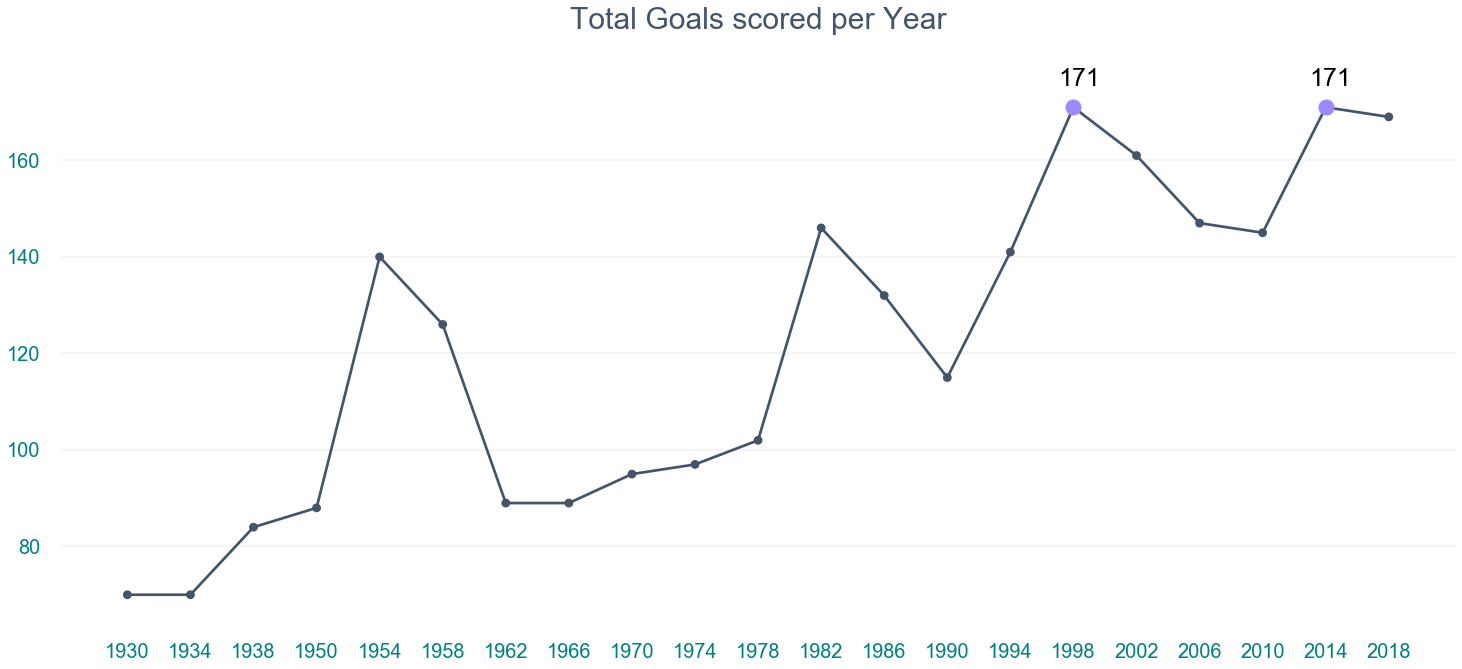

In [51]:
x = cups['Year']
y = cups['GoalsScored']

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Total Goals scored per Year', color='#44546B', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.4)

sns.pointplot(x, y, color='#44546B', ax=ax)

ax.text(0.73, 1, '171', ha='center', va='center', color='k', fontsize=25, transform=ax.transAxes)
ax.text(0.91, 1, '171', ha='center', va='center', color='k', fontsize=25, transform=ax.transAxes)

# To make the two years of '1998' and '2014' stand out (notice the blue dots in the line chart)
plt.plot([15], [171], marker='o', markersize=15, color='#9c88ff')
plt.plot([19], [171], marker='o', markersize=15, color='#9c88ff')

plt.xlabel('')
plt.ylabel('');

In [52]:
# Here's a lot at the data
pd.DataFrame({'Year': x, 
              'Goals Scored': y}).set_index('Year').style.set_properties(**{'background-color':'black',
                                                          'color' : 'cyan'}).set_caption('Total Goals')

,Goals Scored
Year,
1930,70
1934,70
1938,84
1950,88
1954,140
1958,126
1962,89
1966,89
1970,95


### The years 1998 and 2014 had a total of 171 goals scored each, more than any other year(s)!
### Also, years like 1930, etc. had fewer goals as the number of matches played were far less (17 matches)

# What are The Countries with Most Goals? (top-15)

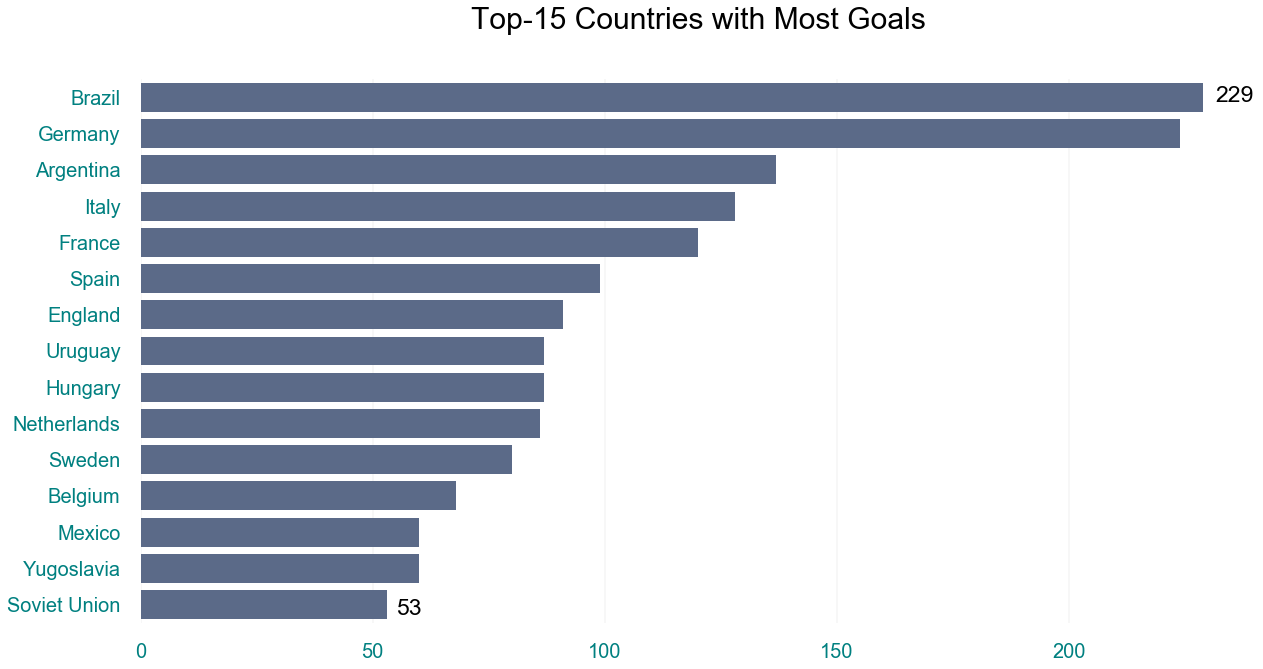

In [53]:
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()

away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()
away_goals.drop(labels=(set(away_goals.index) - set(home_goals.index)), inplace=True)

total_goals = (home_goals + away_goals).astype(int).sort_values(ascending=False)

goal_counts = total_goals[:15]
x = goal_counts.values
y = goal_counts.index

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Top-15 Countries with Most Goals', color='k', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)
    
bar = sns.barplot(x, y, color='#54678f', ax=ax)

ax.text(0.98, 0.97, '229', ha='center', va='center', color='k', fontsize=23, transform=ax.transAxes)
ax.text(0.24, 0.026, '53', ha='center', va='center', color='k', fontsize=23, transform=ax.transAxes)

plt.ylabel('');
plt.xlabel('');

In [54]:
# Here's a look at the data
pd.DataFrame({'Goals': x, 
              'Team': y}).set_index('Team').style.set_properties(**{'background-color':'black',
                                                  'color' : 'cyan'}).set_caption('Goals by Team')

,Goals
Team,
Brazil,229
Germany,224
Argentina,137
Italy,128
France,120
Spain,99
England,91
Uruguay,87
Hungary,87


### Brazil has scored the most no. of goals across all World Cups: 229. A true football powerhouse!
### Soviet Union is on no. 15 with a total of 53 goals

# How do the Teams Compare to Each Other?

In [55]:
results['Total'] = results['Draws'] + results['Losses'] + results['Wins']
results.reset_index(inplace=True)

df = matches.loc[:, ['Home Team Name', 'Home Team Goals', 'Away Team Name', 'Away Team Goals']]

goals = {i: df[df['Away Team Name'] == i]['Away Team Goals'].sum() + df[df['Home Team Name'] == i]['Home Team Goals'].sum()
         for i in df['Home Team Name']}
results['Goals'] = results['Team'].map(goals)
results.dropna(inplace=True)
results['Goals'] = results['Goals'].astype(int)

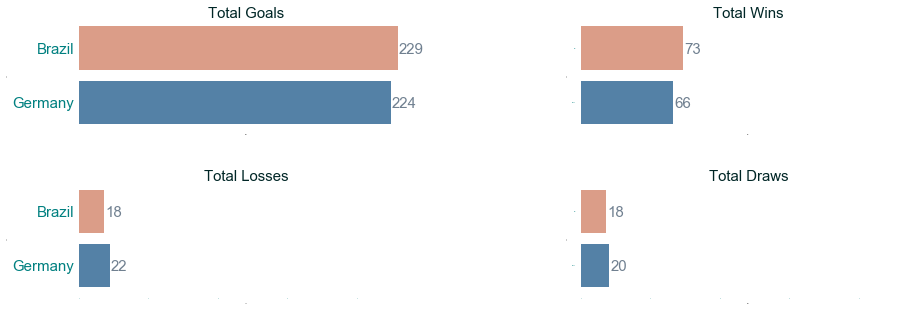

In [56]:
def team_compare(a, b):
    '''
    Compares two teams side by side
    
    Parameters:
    a: Team A
    b: Team B
    '''
    
    flag = 0
    
    fig, ax = plt.subplots(2, 2, figsize=(15, 5), sharex=True)
    plt.style.use('seaborn-whitegrid')
    ((ax0, ax1), (ax2, ax3)) = ax

    df = results[results['Team'].isin([a, b])]
    
    for ax, title in zip([ax0, ax1, ax2, ax3], ['Goals', 'Wins', 'Losses', 'Draws']):
        ax.set_title('Total {}'.format(title), color='#002626', pad=3, fontsize=15)
        
        if ax == ax0 or ax == ax2: ax.tick_params('y', colors='#008080', labelsize=15, pad=5)
        else: ax.tick_params('y', colors='#008080', labelsize=0, pad=5)
        if ax == ax2 or ax == ax3: ax.tick_params('x', colors='#008080', labelsize=10, pad=5)

        ax.tick_params('x', labelsize=0)
        for i in ['right', 'left', 'top', 'bottom']:
            ax.spines[i].set_visible(False)
                
        ax.set_xlabel('', fontsize=0)
        ax.set_ylabel('', fontsize=0)
        
        ax.grid(None)
        
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        sns.barplot(title, 'Team', data=df, palette=['#E9967A', '#4682B4'], ax=ax)
        
        for l, k in zip(df[title].values, [-1, 1]):            
            left, bottom = ax.patches[flag].get_xy()
            width, height = ax.patches[flag].get_width(), ax.patches[flag].get_height()
            right = left + width
            top = bottom + height

            if flag == 0: flag = 1
            else: flag = 0
                
            ax.text(width+0.9, bottom+0.5, l, fontdict={'fontweight': 'normal', 'fontsize': 15, 'color': '#708090'})
            

team_compare('Brazil', 'Germany')

### Not to anger any fans, but it seems that Argentina has had a richer footballing history than Spain...

# Which Team played Whom during a Specific Year?

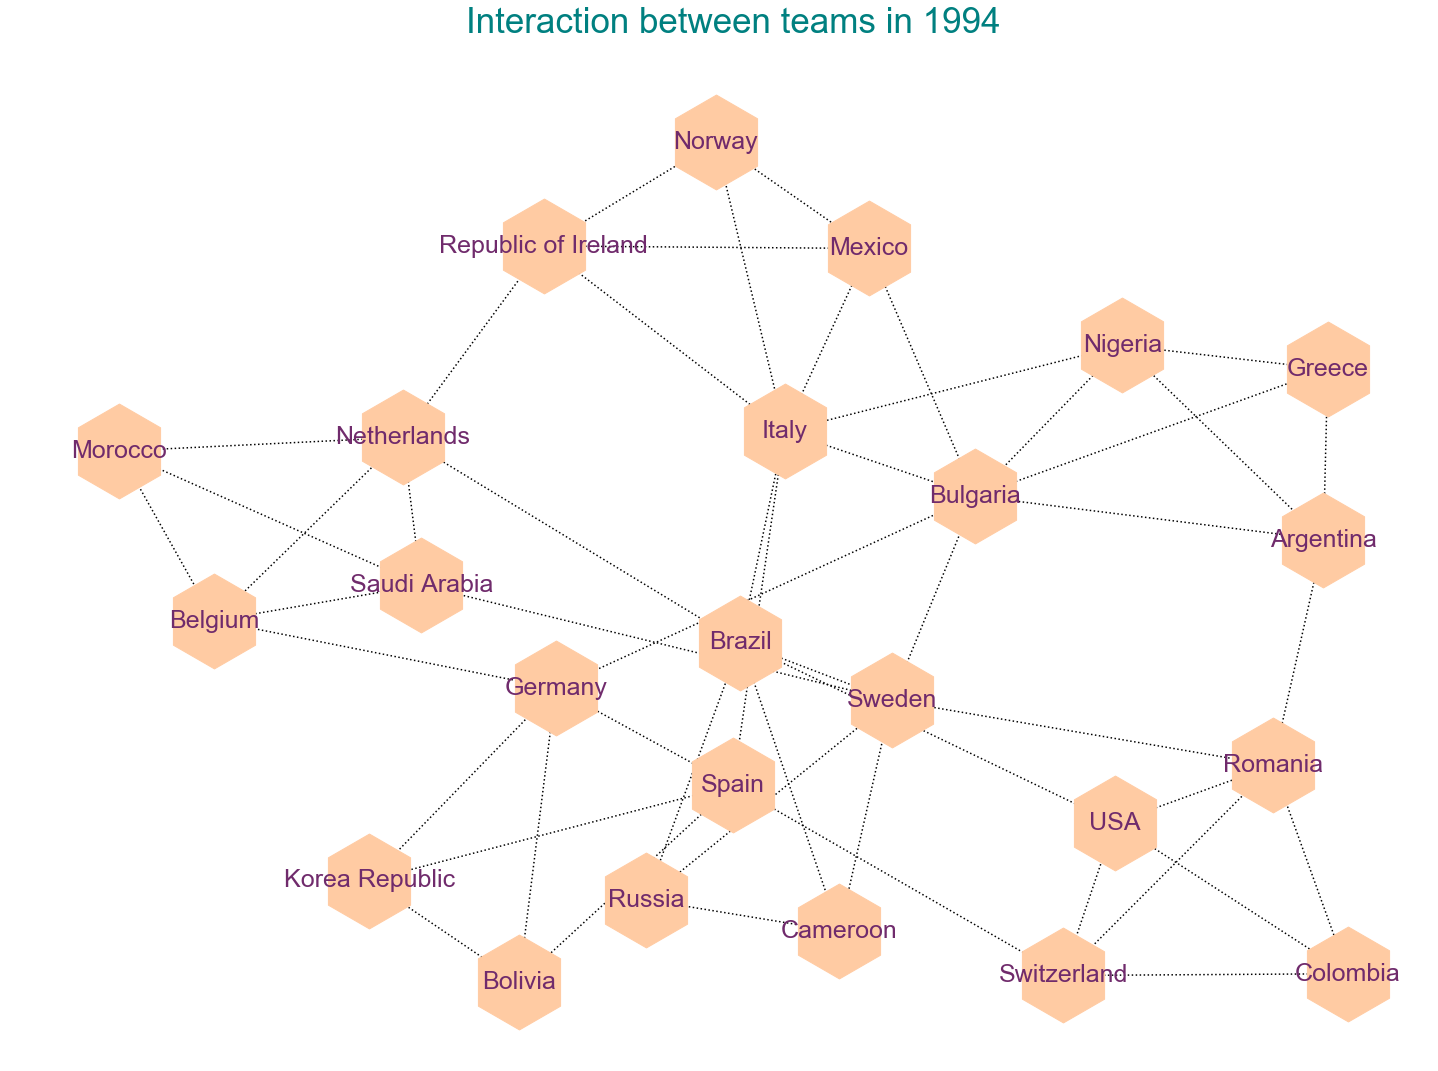

In [57]:
def interactions(year):
    '''
    Draws an interaction map of the participating teams
    
    Parameters:
    year: The year whose interactions are to be analysed
    '''
    
    df = matches.loc[matches['Year'] == year, ['Home Team Name', 'Away Team Name']]
    G = nx.from_pandas_edgelist(df, 'Home Team Name', 'Away Team Name')
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 18))    
    nx.draw_kamada_kawai(G, with_labels=True, node_size=9000, node_color='#ffcba3', node_shape='h', style='dotted', width=1.5,
                         font_color='#702b6c', font_weight=5, font_size=25)
    
    plt.title('Interaction between teams in ' + str(year), color='#008080', pad=40, fontsize=35)
    ax.set_facecolor('salmon')
    

interactions(1994)

# How many people attended the WC each year?

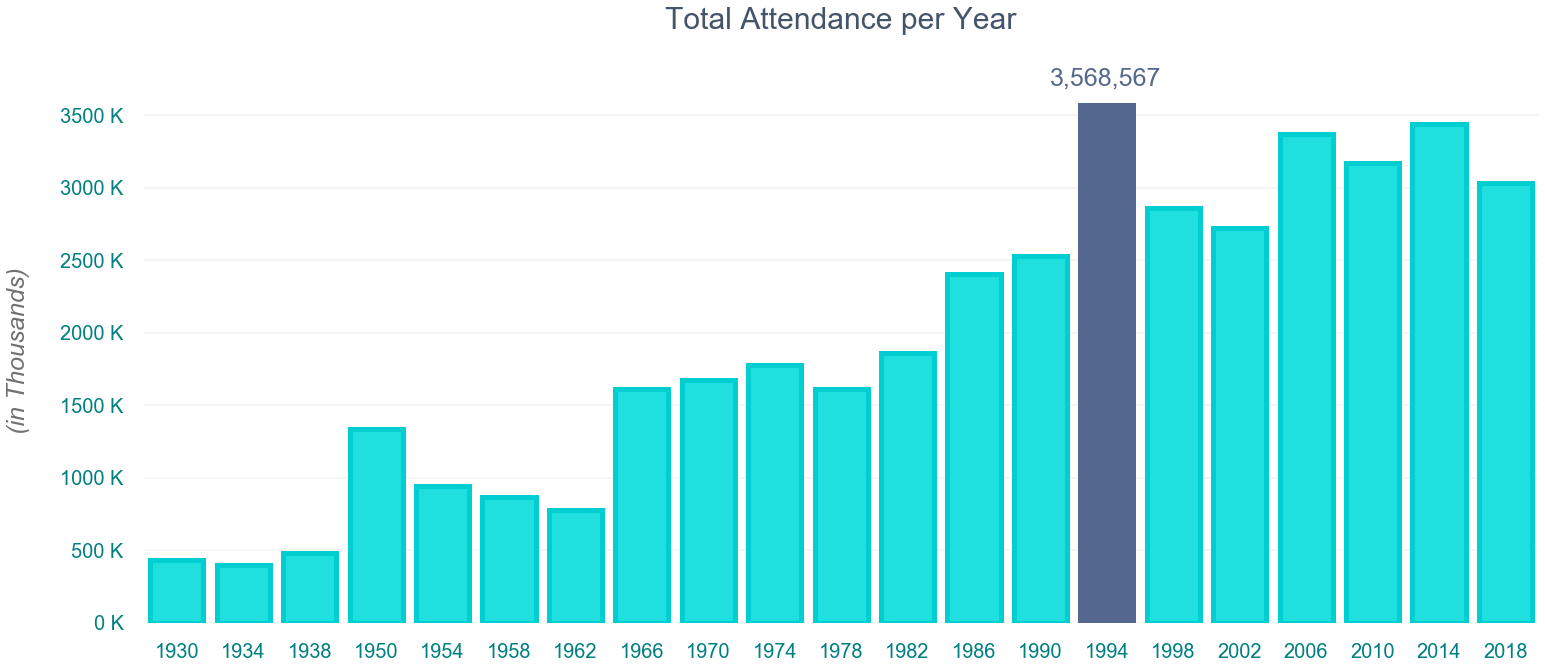

In [58]:
x = cups['Year'].astype(int).values
y = cups['Attendance'].astype(float).values

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title('Total Attendance per Year', color='#44546B', pad=50, fontsize=30)
ax.set_ylabel('(in Thousands)', fontsize=25, color='008080', fontstyle='italic', labelpad=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.4)

def millions(x, pos):
    return '%1.0f K' % (x*1e-3)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

sns.barplot(x, y, color='cyan', edgecolor='#00CED1', linewidth=5, ax=ax)

ax.patches[-7].set_facecolor('#54678f')
ax.patches[-7].set_edgecolor('#54678f')

ax.text(0.69, 1, '3,568,567', ha='center', va='center', color='#54678f', fontsize=25, transform=ax.transAxes);

In [72]:
# Here's a look at the data
attend = cups.loc[:, ['Year', 'Attendance']]
attend['Attendance'] = attend['Attendance'].astype(object)
attend.set_index('Year', drop=True, inplace=True)
attend['Attendance'] = attend['Attendance'].apply(lambda x: '{:,}'.format(x))
attend.style.set_properties(**{'background-color':'black',
                               'color' : 'cyan'}).set_caption('Attendance')

,Attendance
Year,
1930,"434,000"
1934,"395,000"
1938,"483,000"
1950,"1,337,000"
1954,"943,000"
1958,"868,000"
1962,"776,000"
1966,"1,614,677"
1970,"1,673,975"


### Hmm... 1994 saw the highest total attendance?! Here's why: http://bit.ly/1994Attendance

## Well, you made it to the end of our football World Cup analysis! Do you have a burning question that warrants an insight? Go right ahead! :)